In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../NumericData/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data_noise = pd.read_csv('../../NumericData/20_noisy_winequality-red.csv')
data_noise.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.90,0.076,11.00,34.00,0.9978,3.27,0.56,9.4,5
1,7.8,0.88,0.00,2.60,0.098,25.00,67.00,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.30,0.092,38.42,21.75,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.90,0.370,17.00,71.22,1.0000,3.16,0.82,9.8,6
4,7.4,0.70,0.86,6.97,0.076,11.00,26.60,0.9900,3.88,0.56,9.4,5


In [4]:
#Checking correaltion
data_noise.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.40             0.700         0.00            1.90      0.076   
1              7.80             0.880         0.00            2.60      0.098   
2              7.80             0.760         0.04            2.30      0.092   
3             11.20             0.280         0.56            1.90      0.370   
4              7.40             0.700         0.86            6.97      0.076   
5             15.55             0.660         0.00            1.80      0.075   
6              5.96             0.600         0.08            1.60      0.069   
7              7.30             0.890         0.00            1.20      0.065   
8              7.80             0.580         0.02            2.00      0.073   
9              7.50             0.500         0.36            6.10      0.071   
10             6.70             0.560         0.04            1.80      0.420

In [5]:
data_noise.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data_noise['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

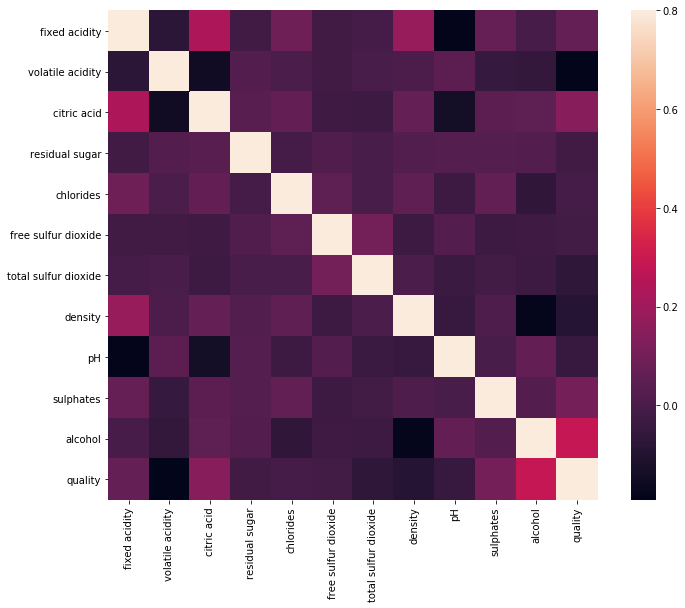

In [8]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data_noise.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
#count of each target variable
from collections import Counter
Counter(data_noise['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

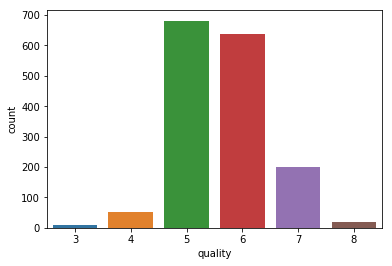

In [10]:
#count of the target variable
sns.countplot(x='quality', data=data_noise)

In [11]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [12]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data_noise['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data_noise['Reviews'] = reviews

In [13]:
#view final data
data_noise.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [14]:
data_noise['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [15]:
Counter(data_noise['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [16]:
x = data.iloc[:,:11]
y = data['Reviews']

In [17]:
x_noise = data_noise.iloc[:,:11]
y_noise = data_noise['Reviews']

In [18]:
x_noise.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.40,0.70,0.00,1.90,0.076,11.00,34.00,0.9978,3.27,0.56,9.4
1,7.80,0.88,0.00,2.60,0.098,25.00,67.00,0.9968,3.20,0.68,9.8
2,7.80,0.76,0.04,2.30,0.092,38.42,21.75,0.9970,3.26,0.65,9.8
3,11.20,0.28,0.56,1.90,0.370,17.00,71.22,1.0000,3.16,0.82,9.8
4,7.40,0.70,0.86,6.97,0.076,11.00,26.60,0.9900,3.88,0.56,9.4
5,15.55,0.66,0.00,1.80,0.075,13.00,117.17,0.9978,3.51,0.56,9.4
6,5.96,0.60,0.08,1.60,0.069,15.00,59.00,0.9964,3.30,0.46,9.4
7,7.30,0.89,0.00,1.20,0.065,15.00,21.00,1.0000,3.39,0.47,10.0
8,7.80,0.58,0.02,2.00,0.073,9.00,18.00,1.0000,3.36,0.57,9.5
9,7.50,0.50,0.36,6.10,0.071,17.00,98.17,1.0000,3.35,0.80,10.5


In [19]:
y_noise.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_noise = sc.fit_transform(x_noise)

In [21]:
#view the scaled features
print(x_noise)

[[-0.61173955  0.28217204 -1.34307266 ..., -0.28961007 -0.63315952
  -0.90720053]
 [-0.44994531  0.87599909 -1.34307266 ..., -0.58986993 -0.3162081
  -0.62493742]
 [-0.44994531  0.48011439 -1.1798522  ..., -0.33250433 -0.39544596
  -0.62493742]
 ..., 
 [-1.05667369 -0.3446454  -0.81260617 ...,  0.35380393  1.53267518
   0.22185192]
 [ 2.78189452  0.10072489  1.63570071 ...,  0.99721792 -0.23697025
  -0.3426743 ]
 [-1.17801937 -0.97146284  0.57476773 ...,  0.22512113 -0.36903334
   0.22185192]]


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
#view the scaled features
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...,  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ..., -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ..., -0.33117661 -0.04808883
  -0.58477711]
 ..., 
 [-1.1603431  -0.09955388 -0.72391627 ...,  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...,  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...,  0.51112954  0.01092425
   0.54162988]]


In [24]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

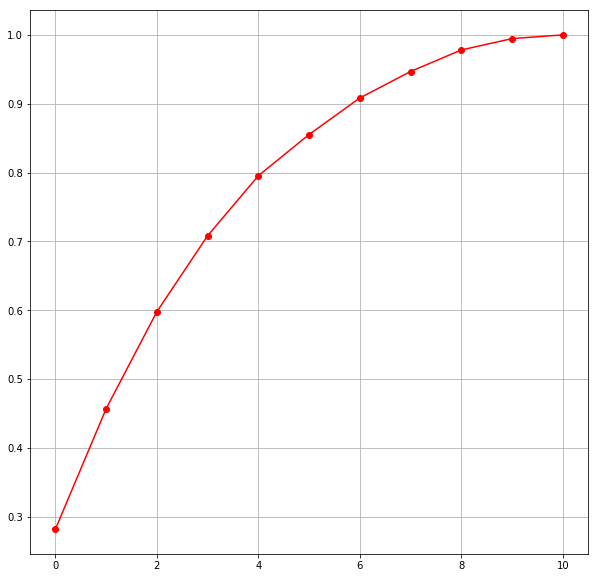

In [25]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [26]:
from sklearn.decomposition import PCA
pca_noise = PCA()
x_pca_noise = pca_noise.fit_transform(x_noise)

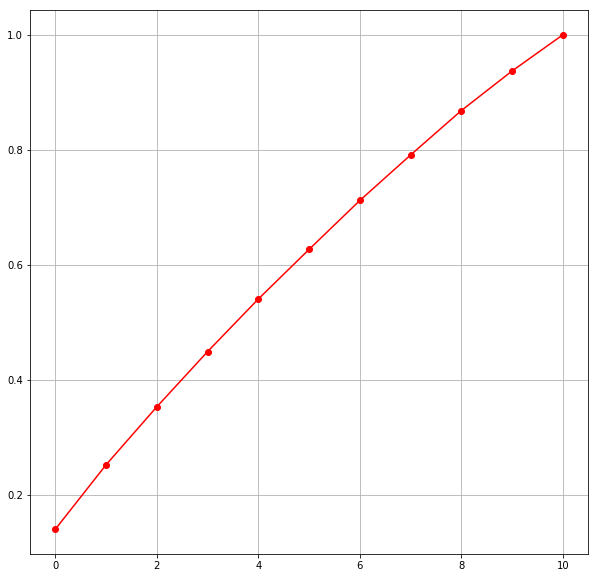

In [27]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca_noise.explained_variance_ratio_), 'ro-')
plt.grid()

In [28]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [29]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ..., -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...,  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...,  0.40147313 -0.53955348
   0.59794606]
 ..., 
 [-1.45612897  0.31174559  1.12423941 ..., -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ..., -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ..., -0.49615364  1.18913227
   0.04217568]]


In [30]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new_noise = PCA(n_components=8)
x_new_noise = pca_new_noise.fit_transform(x_noise)

In [31]:
print(x_new_noise)

[[-0.9100487  -1.05062184 -1.11719269 ...,  0.10119421 -0.32125438
  -0.58942268]
 [-0.9671752  -1.18633981 -0.25655081 ...,  0.20528792  0.4135373
  -0.48903289]
 [-0.92435557 -1.01422986 -0.02591524 ..., -0.47559881 -0.25445087
  -0.62293102]
 ..., 
 [-1.08133319  0.57501081  0.04480394 ...,  0.90573185 -0.62790338
  -0.63973998]
 [ 1.65328258  0.51650292  0.15339697 ..., -0.80390301 -0.42460137
   1.33487319]
 [-0.05200581  0.2882147  -0.19880576 ..., -0.33556171 -1.49274078
  -0.05163434]]


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [33]:

x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_new_noise, y_noise, test_size = 0.25)

In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
#for name, model in models:
    #kfold = KFold(n_splits=10, random_state=0)
    #cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    #results.append(cv_results)
    #names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

In [35]:
# Evaluate each model in turn
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, x_train_noise, y_train_noise, 
                                       cv=10, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(x_train_noise, y_train_noise)
    cv_test_results = accuracy_score(y_test_noise, clf.predict(x_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)

C:\Users\souro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\linear_model\logi

LR: 0.984160 (0.002479) 0.975000
LDA: 0.984160 (0.002479) 0.960000
KNN: 0.984160 (0.002479) 0.977500
CART: 0.969132 (0.009209) 0.930000


C:\Users\souro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


NB: 0.982493 (0.004473) 0.957500
RF: 0.982493 (0.004473) 0.957500
SVM: 0.984160 (0.002479) 0.977500


C:\Users\souro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\souro\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gam